# Sample (maelzel.snd.audiosample)

A Sample holds the audio data as a float64 numpy array, plus needed metadata like samplerate, number of channels and any other information contained in an soundfile. As a backend it uses [soundfile](https://pypi.org/project/SoundFile)

In [25]:
from maelzel.snd.audiosample import Sample
from IPython.display import display

A Sample can be created either from the path to an soundfile, from a numpy.array or from another Sample

Sample(dur=15.984467120181407, sr=44100, ch=1)
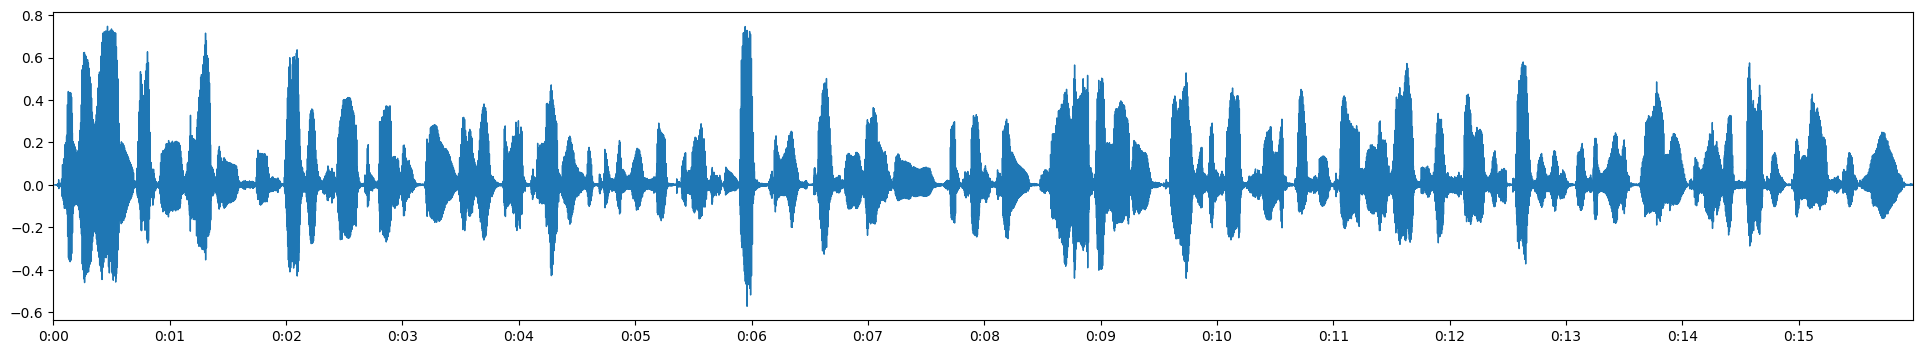

In [30]:
s = Sample("snd/finneganswake.flac")
s

## Operations on Samples

### Slice

Slicing returns a *view* into the source sample. That means that any modification in the slice will modify the source itself. Use `.copy()` to prevent modifying the source `Sample`

**NB**: notice that slicing does not work with sample indexes but with times. If you intend to slice by index you can access the `.samples` attribute and slice the array directly

In [32]:
# Slice 1 second of audio, from 0:03 to 0:04, adjust the gain x3 (this returns a new Sample)

s[3:4] * 3

Sample(dur=1.0, sr=44100, ch=1)

Sample(dur=2.0, sr=44100, ch=1)

Sample(dur=2.0, sr=44100, ch=1)
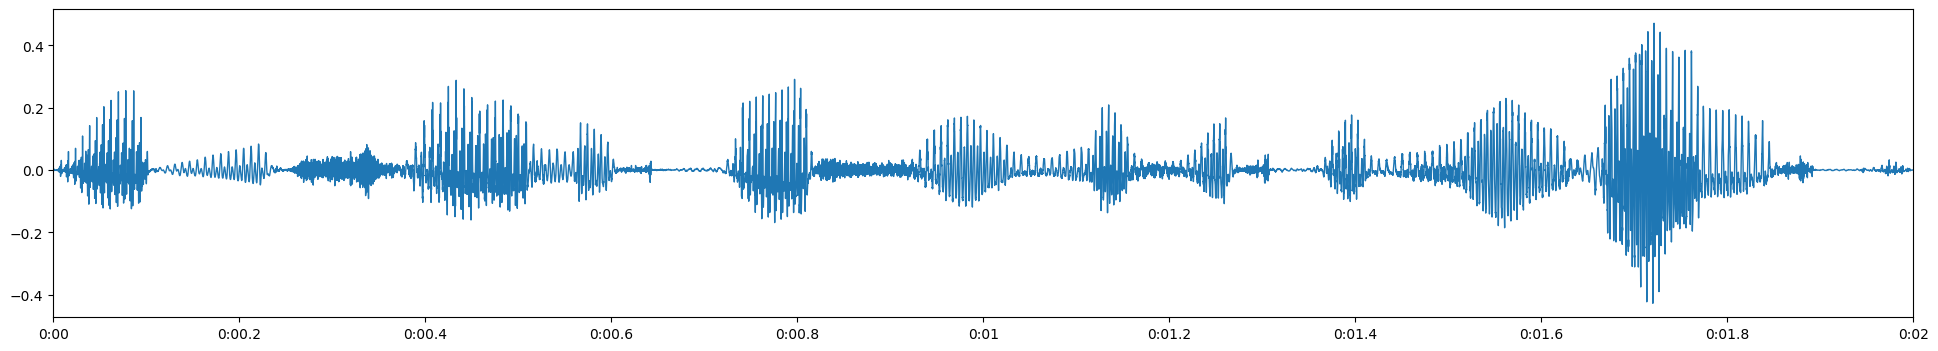

In [33]:
# Slice from 0:04 until 0:06 and apply a fadein / fadeout to a copy
s2 = s[4:6].copy().fade(0.2)
display(s2)

# A second copy, in reverse
s3 = s2.copy().reverse()
display(s3)


### Sidenote: copy vs in-place

A `Sample` can be subjected to multiple operations: **fadein**, **fadeout**, **normalization**, **gain**, etc. Some operations are performed *in place* while others return a copy. In general, **when the number of samples or the number of channels is modified, a copy is returned**. Otherwise the operation is performed *in-place*

* **In place**: `fade`, `normalize`, `reverse`
* **Copy**: all others (`appendSilence`, `prependSilence`, `mixdown`, `stripLeft`, ...)

Sample(dur=15.984467120181407, sr=44100, ch=1)
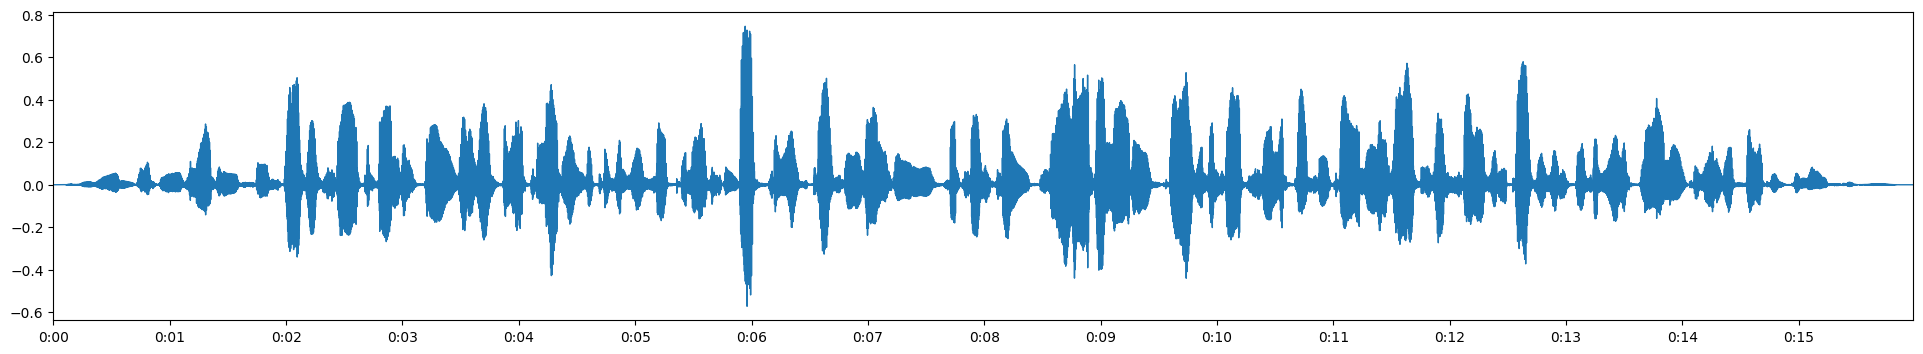

In [21]:
s2 = s.copy().fade(3, shape='halfcos')
s2

## Plotting

### Spectrogram

Plot the spectrogram of a fragment (from second 1 to 7). 

**NB**: slicing works with time, not with samples, so `1:7` means all samples with time >= 1 and < 7

<Axes: >

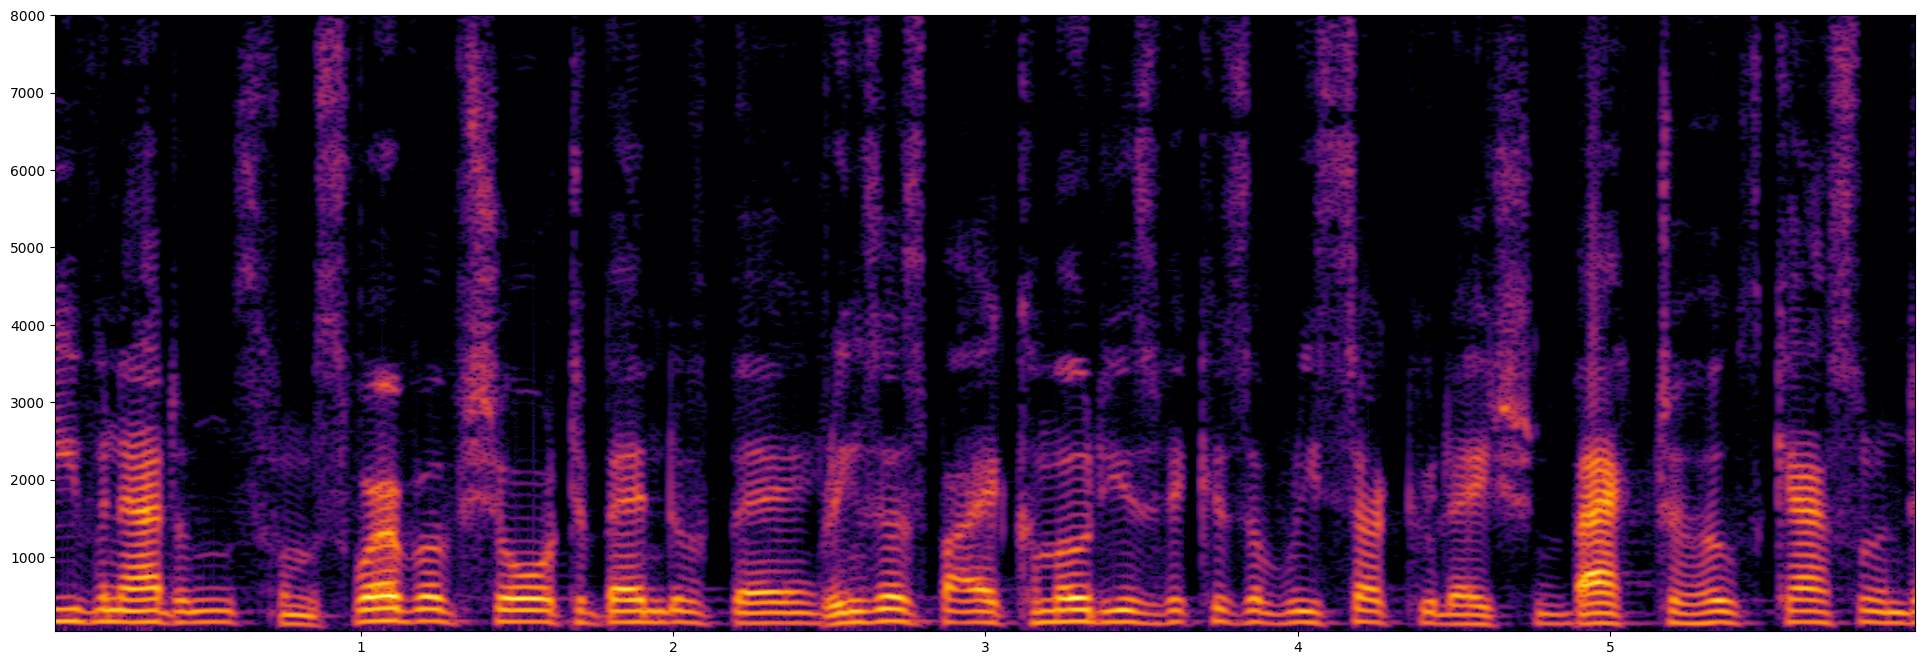

In [3]:
fragment = s[1:7]
fragment.plotSpectrogram(fftsize=2048, overlap=8, mindb=-100, maxfreq=8000)

### Mel Spectrogram

<Axes: xlabel='Time'>

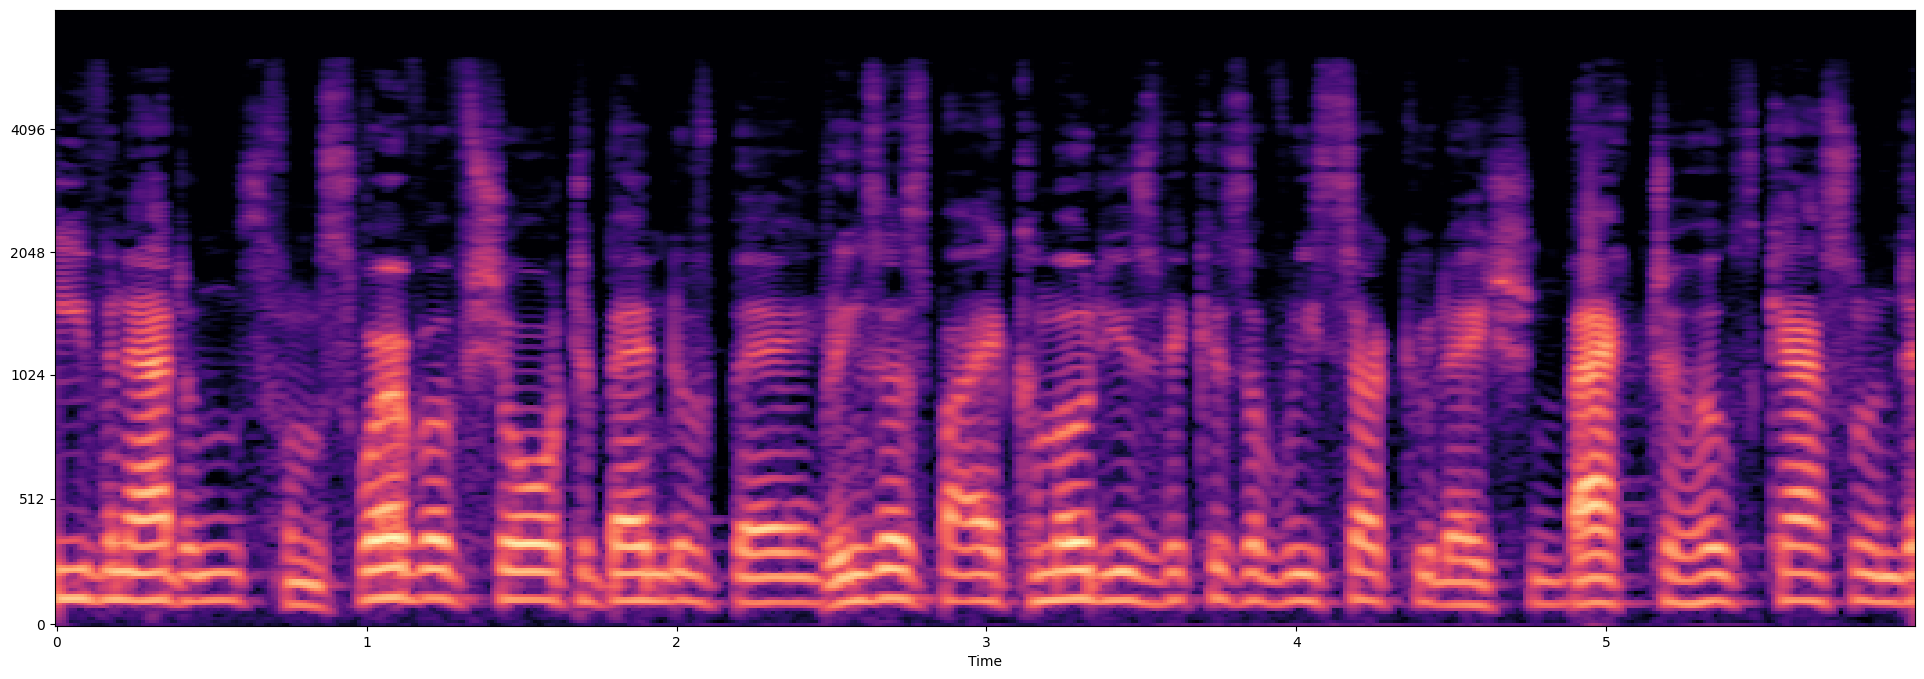

In [7]:
fragment.plotMelSpectrogram(fftsize=4096, winlength=None, overlap=8, nmels=256, cmap='magma')

## Playback

TODO